1. Load the Data set Download and read the iris ower data set as a csv file from here.

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

attributes=["sp_len","sp_wd","pt_len","pt_wd","classes"]
iris=pd.read_csv("iris.data",names=attributes) #while using data.columns=[] you wull lose very first row replace by column name
print(iris)
iris.head()   #just to verify intitial enrty are preserved or not

     sp_len  sp_wd  pt_len  pt_wd         classes
0       5.1    3.5     1.4    0.2     Iris-setosa
1       4.9    3.0     1.4    0.2     Iris-setosa
2       4.7    3.2     1.3    0.2     Iris-setosa
3       4.6    3.1     1.5    0.2     Iris-setosa
4       5.0    3.6     1.4    0.2     Iris-setosa
..      ...    ...     ...    ...             ...
145     6.7    3.0     5.2    2.3  Iris-virginica
146     6.3    2.5     5.0    1.9  Iris-virginica
147     6.5    3.0     5.2    2.0  Iris-virginica
148     6.2    3.4     5.4    2.3  Iris-virginica
149     5.9    3.0     5.1    1.8  Iris-virginica

[150 rows x 5 columns]


,sp_len,sp_wd,pt_len,pt_wd,classes
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Q2. Normalize the Data set Once you read the csv file, try finding the minimum and maximum values of each feature. Use these values to normalizethe data. What is Normalization? Use Range normalization aka minmax
normalization (Dont use the inbuilt function).

In [2]:
#normalization of ratings means adjusting values measured on different scales to a notionally common scale, 
#often prior to averaging

spl_min=min(iris["sp_len"])
print(spl_min)
spl_max=max(iris["sp_len"])
print(spl_max)
spl_d=spl_max-spl_min
print(spl_d)

spw_min=min(iris["sp_wd"])
print(spw_min)
spw_max=max(iris["sp_wd"])
print(spw_max)
spw_d=spw_max-spw_min
print(spw_d)

ptl_min=min(iris["pt_len"])
print(ptl_min)
ptl_max=max(iris["pt_len"])
print(spl_max)
ptl_d=ptl_max-ptl_min
print(ptl_d)

ptw_min=min(iris["pt_wd"])
print(ptw_min)
ptw_max=max(iris["pt_wd"])
print(ptw_max)
ptw_d=ptw_max-ptw_min
print(ptw_d)

spl_n= (iris[["sp_len"]]-spl_min)/spl_d
print(spl_n)

spw_n= (iris[["sp_wd"]]-spw_min)/spw_d
print(spw_n)


ptl_n= (iris[["pt_len"]]-ptl_min)/ptl_d
print(ptl_n)

ptw_n= (iris[["pt_wd"]]-ptw_min)/ptw_d
print(ptw_n)        




4.3
7.9
3.6000000000000005
2.0
4.4
2.4000000000000004
1.0
7.9
5.9
0.1
2.5
2.4
       sp_len
0    0.222222
1    0.166667
2    0.111111
3    0.083333
4    0.194444
..        ...
145  0.666667
146  0.555556
147  0.611111
148  0.527778
149  0.444444

[150 rows x 1 columns]
        sp_wd
0    0.625000
1    0.416667
2    0.500000
3    0.458333
4    0.666667
..        ...
145  0.416667
146  0.208333
147  0.416667
148  0.583333
149  0.416667

[150 rows x 1 columns]
       pt_len
0    0.067797
1    0.067797
2    0.050847
3    0.084746
4    0.067797
..        ...
145  0.711864
146  0.677966
147  0.711864
148  0.745763
149  0.694915

[150 rows x 1 columns]
        pt_wd
0    0.041667
1    0.041667
2    0.041667
3    0.041667
4    0.041667
..        ...
145  0.916667
146  0.750000
147  0.791667
148  0.916667
149  0.708333

[150 rows x 1 columns]


In [3]:
#saving it as csv for future usage only

df=pd.DataFrame(spl_n)
df.loc[:,"spw_n"]=spw_n
df.loc[:,"ptl_n"]=ptl_n
df.loc[:,"ptw_n"]=ptw_n
df.loc[:,"classes"]=iris["classes"]
df
df.to_csv("mod_iris.csv",index=False)



In [4]:
data=pd.read_csv("mod_iris.csv")
print(type(data))
print(data)

<class 'pandas.core.frame.DataFrame'>
       sp_len     spw_n     ptl_n     ptw_n         classes
0    0.222222  0.625000  0.067797  0.041667     Iris-setosa
1    0.166667  0.416667  0.067797  0.041667     Iris-setosa
2    0.111111  0.500000  0.050847  0.041667     Iris-setosa
3    0.083333  0.458333  0.084746  0.041667     Iris-setosa
4    0.194444  0.666667  0.067797  0.041667     Iris-setosa
..        ...       ...       ...       ...             ...
145  0.666667  0.416667  0.711864  0.916667  Iris-virginica
146  0.555556  0.208333  0.677966  0.750000  Iris-virginica
147  0.611111  0.416667  0.711864  0.791667  Iris-virginica
148  0.527778  0.583333  0.745763  0.916667  Iris-virginica
149  0.444444  0.416667  0.694915  0.708333  Iris-virginica

[150 rows x 5 columns]


Q3 Distance Metric Use the Euclidean distance metric for calculating distance between 2 arrays.
Write a function that calculates the Euclidean distance between 2 input arrays. This will be later used to calculate the
closeness of any test sample with rest of the records.

In [5]:
x=data.iloc[:,:-1].values
print(x)
y=data.iloc[:,4].values
print(y)

def ec_ds(a0,a1,a2,a3):
    dis=(((x[:,0]-a0)**2)+((x[:,1]-a1)**2)+((x[:,2]-a2)**2)+((x[:,3]-a3)**2))*.5
    return dis
dis=ec_ds(0,0,0,0)
print(dis)

[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]
 [0.30555556 0.70833333 0.08474576 0.04166667]
 [0.13888889 0.58333333 0.10169492 0.04166667]
 [0.13888889 0.41666667 0.06779661 0.        ]
 [0.         0.41666667 0.01694915 0.        ]
 [0.41666667 0.83333333 0.03389831 0.04166667]
 [0.38888889 1.         0.08474576 0.125     ]
 [0.30555556 0.79166667 0.05084746 0.125     ]
 [0.22222222 0.625      0.06779661 0.08333333]
 [0.38888889 0.75       0.11864407 0.08333333]
 [0.22222222 0.75       0.08474576 0.08333333]
 [0.30555556 0.58333333 0.11864407 0.04166667]
 [0.22222222 

Q4. Nearest Neighbours Use the distance function to get the nearest neighbours for a test record. Write a function that takes in 3 inputs, the dataset,the test example and the number of neighbours (k). The output of this function will be a list of 
k entries in the dataset that are closest to the test record.

In [48]:
def test_knn(dataset,a0,a1,a2,a3,neighours_k):   #put dataset=data coz its modified now
    dis=ec_ds(a0,a1,a2,a3)
    print(dis)
    #finding location of minimum three entries
    min_ele=dis[0]
    for i in range(1,len(dis)): 
        if dis[i]<min_ele: 
            min_ele=dis[i]
            print(dataset.iloc[i,:].values)

5. Prediction using KNN Write a function that takes 3 inputs, first the dataset, second a test record and third the 
number of neighbours. The output of this function will be to return the label of the test record using KNN

In [55]:
#taking training set to be 70 percent of the given dataset and the testing set being 30 % of the dataset so 150*0.7=105
x=data.iloc[:,:-1].values
y=data.iloc[:,4].values
#We will implement this algorithm from beginning without the help of scikit learn.
x_train=x
x_train
y_train=y
y_train
x_test=x
x_test
y_test=y
y_test

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [57]:
def classification(dataset,a0,a1,a2,a3,k):
    spl_n= (a0-spl_min)/spl_d
    print(spl_n)
    spw_n= (a1-spw_min)/spw_d
    print(spw_n)
    ptl_n= (a2-ptl_min)/ptl_d
    print(ptl_n)
    ptw_n= (a3-ptw_min)/ptw_d
    print(ptw_n)
    dis=ec_ds(a0,a1,a2,a3)
    test_knn(dataset,spl_n,spw_n,ptl_n,ptw_n,k)

Test Use the KNN predictor, to classify the following records:
1. [5.1, 2.5, 3.2, 4.3]
2. [4.9, 3, 1.4, 0.2]
3. [6, 3, 4.8, 1.8]
Take k as 5.


In [61]:
classification(data,5.1, 2.5, 3.2, 4.3,5)
classification(data,6, 3, 4.8, 1.8,5)
classification(data,6, 3, 4.8, 1.8,5)


# the maximum class count represent the predictor output
# so first one belong to "Iris.virgincia"
#second one belong to "Iris-versicolor"
#third one belong to "Iris-versicolor"



0.22222222222222213
0.20833333333333331
0.3728813559322034
1.7500000000000002
[1.5925453  1.52898434 1.55976187 1.54160751 1.61116026 1.52624191
 1.5153848  1.57141075 1.53853295 1.60555427 1.62918467 1.56975715
 1.60296196 1.64098661 1.73087296 1.6890805  1.54577653 1.5222328
 1.58179747 1.57710134 1.56530441 1.48682356 1.64340143 1.34134608
 1.55726074 1.51805962 1.42778185 1.58790381 1.57643804 1.54467999
 1.53069465 1.43560828 1.79536908 1.76278063 1.60555427 1.55957667
 1.6040327  1.60555427 1.55166001 1.57102495 1.52793316 1.45810292
 1.57249335 1.31233046 1.49128852 1.46060085 1.64267382 1.55791952
 1.62725566 1.5616811  0.94416244 0.81256553 0.87831662 0.80008782
 0.79213817 0.82722602 0.77624191 0.9478674  0.91009727 0.74093095
 0.96869242 0.74131199 0.99356776 0.81482216 0.80708214 0.88073387
 0.73617664 0.97932363 0.75932479 0.90557216 0.64653185 0.83683551
 0.77762217 0.91291244 0.87771957 0.85922538 0.88611518 0.75381073
 0.74996908 0.96136218 0.90110071 0.95594432 0.86361

7. Accuracy Use the same KNN predictor to find the labels of the training
data. Report the accuracy for each class. You can use confusion matrix
to visualize the result (not necessary).

In [10]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(5,metric="euclidean")
classifier.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [47]:
#predicting the test set result
y_pred=classifier.predict(x_test)
y_pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [12]:
#evaluation of the data
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  4, 46]], dtype=int64)

In [13]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)


0.96

   #                                         CLUSTERING

1. Dataset Load the dataset and read it as a csv file.

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm 
from mpl_toolkits.mplot3d import axes3d
from sklearn.cluster import KMeans
%matplotlib notebook



df=pd.read_csv("dataset.csv",index_col=0)   #index values are already present
print(df)


     feature1  feature2
0    0.836857  2.136359
1   -1.413658  7.409623
2    1.155213  5.099619
3   -1.018616  7.814915
4    1.271351  1.892542
..        ...       ...
295  1.973698  1.579798
296  2.518342  1.391766
297  0.438990  4.535929
298  0.369479  7.791105
299 -1.791458  2.749669

[300 rows x 2 columns]


2. Visualization Plot the dataset using matplotlib.

<IPython.core.display.Javascript object>


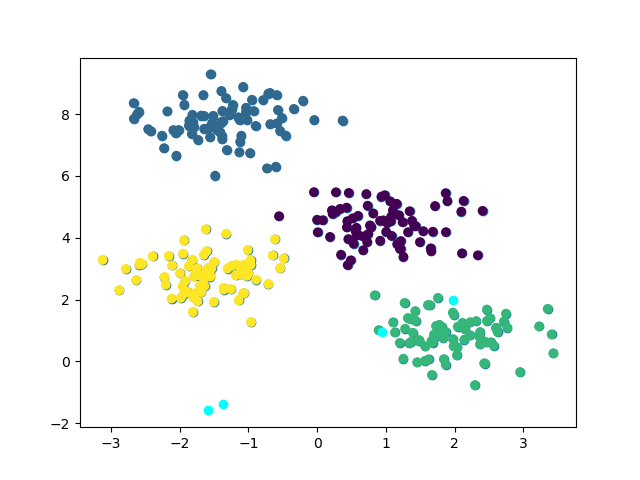

In [43]:
plt.scatter(df["feature1"],df["feature2"])
          


3. K Means Algorithm Use the inbuilt algorithm for K Means in scikit
learn. Vary k from 2 to 10 and plot the clusters in different colours to
visualize.
From the plots, which value of k is the most appropriate for this dataset.

In [46]:
from sklearn.cluster import KMeans
X=np.array(df[["feature1","feature2"]])
kmean=KMeans(n_clusters=4)
kmean.fit(X)
y_kmean=kmean.predict(X)
print(y_kmean)

[1 2 0 2 1 1 3 0 2 2 3 2 0 2 1 0 0 1 3 3 1 1 0 3 3 0 1 0 3 0 2 2 0 2 2 2 2
 2 3 1 0 3 0 0 3 3 2 3 2 1 3 1 2 1 1 3 2 3 2 1 2 0 2 3 3 3 2 1 2 3 0 3 2 3
 3 2 3 0 1 2 1 0 1 1 2 0 1 0 2 2 0 1 2 3 3 0 1 1 0 3 2 1 2 1 0 1 1 0 2 0 3
 3 1 2 1 0 2 1 1 0 3 1 3 1 1 1 1 3 1 3 2 3 3 1 2 3 3 2 0 2 2 3 0 3 0 3 2 0
 2 2 2 0 2 0 1 3 2 3 1 0 2 0 0 1 0 3 3 0 1 0 0 2 1 0 3 2 1 1 0 3 1 0 3 3 0
 0 0 0 1 2 0 3 0 0 3 3 3 0 3 2 0 3 1 3 0 2 3 2 0 2 0 3 0 0 2 3 3 1 1 0 2 1
 1 3 1 3 0 2 2 0 0 2 0 1 3 0 1 3 2 3 1 0 1 2 2 2 2 3 3 2 0 3 1 0 3 3 3 1 1
 2 0 0 3 1 2 3 0 2 0 1 1 3 3 0 1 1 1 0 2 2 1 1 0 1 1 1 2 3 2 0 1 1 2 2 2 1
 1 0 2 3]


In [45]:
# looking for the cluster center to start with
k=kmean.cluster_centers_
print(k)

plt.scatter(X[:,0],X[:,1],c=y_km)
centers=km.cluster_centers_
plt.scatter(centers[:,0],centers[:,0],c="cyan")
plt.show()


#the updated output can be seen in figure2 output

[[ 0.94973532  4.41906906]
 [-1.37324398  7.75368871]
 [ 1.98258281  0.86771314]
 [-1.58438467  2.83081263]]
